In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
taxi = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/3_taxi_peru.csv', sep=';')

In [25]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [9]:
taxi = pd.read_csv(path_to_file, encoding='Windows-1251', sep=';')

In [19]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])


In [22]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [12]:
platforms = taxi.groupby('source', as_index=False).agg({'source': 'count'})

In [13]:
taxi[['source']].value_counts(normalize = True)

source 
iPhone     0.423743
web        0.331956
Android    0.213546
iPad       0.024839
Wap        0.005916
dtype: float64

In [14]:
print(platforms)

   source
0    4909
1     136
2     571
3    9741
4    7631


In [15]:
platforms.value_counts(normalize=True)

source
9741      0.2
7631      0.2
4909      0.2
571       0.2
136       0.2
dtype: float64

In [16]:
platforms.sum()

source    22988
dtype: int64

In [59]:
9741/22988

0.42374282234209154

In [23]:
a = taxi.groupby('source', as_index=False).agg({'taxi_id':'count'})
print(a)

    source  taxi_id
0  Android     4031
1      Wap      110
2     iPad      473
3   iPhone     8354
4      web     6650


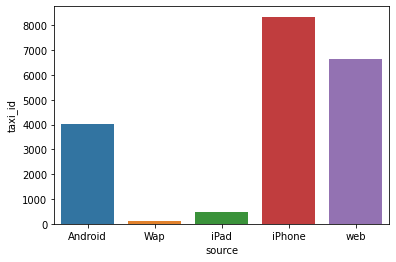

In [24]:
b = sns.barplot(x='source', y='taxi_id', data=a)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


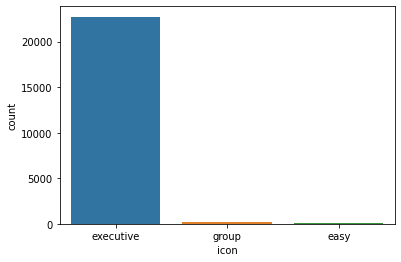

In [94]:
sns.countplot(taxi['icon'])

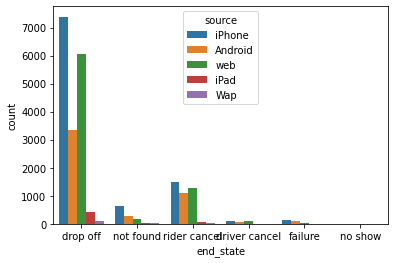

In [21]:
sns.countplot(x='end_state', hue='source', data=taxi)

In [168]:
c = taxi['driver_score'].value_counts(normalize=True).mul(100).round(2).reset_index()
print(c)

   index  driver_score
0    5.0         58.81
1    4.0         21.88
2    0.0         14.30
3    3.0          2.97
4    1.0          1.23
5    2.0          0.81


In [149]:
driver_score_counts = taxi['driver_score'] \
.value_counts(normalize = True) \
.mul(100).round(2).reset_index() \
.rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
.sort_values('driver_score', ascending=True)
print(driver_score_counts)

   driver_score  percentage
2           0.0       14.30
4           1.0        1.23
5           2.0        0.81
3           3.0        2.97
1           4.0       21.88
0           5.0       58.81


In [146]:
driver_score_counts = taxi['driver_score'] \
.value_counts(normalize = True)

   index  driver_score
0    5.0         58.81
1    4.0         21.88
2    0.0         14.30
3    3.0          2.97
4    1.0          1.23
5    2.0          0.81


In [173]:
rider_score_counts = taxi['rider_score'] \
.value_counts(normalize = True) \
.mul(100).round(2).reset_index() \
.rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
.sort_values('rider_score', ascending=True)
print(rider_score_counts)

   rider_score  percentage
2          0.0        2.29
4          1.0        0.21
5          2.0        0.19
3          3.0        1.38
1          4.0        8.83
0          5.0       87.10
